# Speed Dating
this dataset comes from https://www.kaggle.com/datasets/ulrikthygepedersen/speed-dating , which in turn is derived from http://www.stat.columbia.edu/~gelman/arm/examples/speed.dating/. A series of 21 speed-dating events were held in 2002-2004, and data was collected about participants before and during the event. The dataset includes information about participants' age, gender, race, attributes, priorities, interests, and reactions to one another.

### 1. Import libraries

In [61]:
import pandas as pd
import numpy as np

# Modeling
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score,precision_score,balanced_accuracy_score
import missingno
import xgboost as xgb

# data sampling
# from imblearn.over_sampling import SMOTE
#deal with imbalance data
# from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler

# Datavisualiztion
import matplotlib.pyplot as plt
import seaborn as sns

### Remove unnecessary warnings
import warnings
warnings.filterwarnings('ignore')
RANDOM_SEED = 42

import re

### 2. Import Data
 records = 8378  and column = 123

In [62]:
dating = pd.read_csv('C:/Users/admin\Downloads/3 year/data mining/projectspeeddating/dataraw/speeddating.csv')
print('Data size: ',dating.shape)


Data size:  (8378, 123)


In [63]:
pd.set_option('display.max_columns', None)  # to see all column
dating.head(10)

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',35.00,20.00,20.00,20.00,0.00,5.00,b'[21-100]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,8.0,6.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',6.0,9.0,7.0,7.0,6.0,5.0,b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[6-8]',b'[0-5]',9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.14,b'[0-0.33]',3.0,2.0,4.0,b'[0-4]',b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',60.00,0.00,0.00,40.00,0.00,0.00,b'[21-100]',b'[0-15]',b'[0-15]',b'[21-100]',b'[0-15]',b'[0-15]',7.0,8.0,10.0,7.0,7.0,5.0,b'[6-8]',b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[0-5]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',7.0,8.0,7.0,8.0,5.0,6.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[0-5]',b'[6-8]',9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.54,b'[0.33-1]',3.0,2.0,4.0,b'[0-4]',b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',19.00,18.00,19.00,18.00,14.00,12.00,b'[16-20]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',10.0,10.0,10.0,10.0,10.0,10.0,b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',

### 3. Exploratory Data Analysis
we going to perform EDA both categorical and numerical columns of data set

#### 3.1 First glimpse of data 

We will take a look at our dataframe and the output below shows that 
the dating data contain both categorical and numerical. (Which shown in Float and object)

In [64]:
## Looking at data type of data set
dating.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 123 columns):
 #    Column                           Non-Null Count  Dtype  
---   ------                           --------------  -----  
 0    has_null                         8378 non-null   object 
 1    wave                             8378 non-null   float64
 2    gender                           8378 non-null   object 
 3    age                              8283 non-null   float64
 4    age_o                            8274 non-null   float64
 5    d_age                            8378 non-null   float64
 6    d_d_age                          8378 non-null   object 
 7    race                             8378 non-null   object 
 8    race_o                           8378 non-null   object 
 9    samerace                         8378 non-null   object 
 10   importance_same_race             8299 non-null   float64
 11   importance_same_religion         8299 non-null   float64
 12   d_im

as we can see from the output it shows that this dataset contain missing value. Since the number of value in some column is not equal to 8738

In [65]:
dating.dtypes.value_counts()

object     64
float64    59
dtype: int64

The speed dating dataset consist of  
64 column of data are object(string)  
59 column of data are float  
123 column total

In [66]:
pd.set_option('display.max_rows', None)
dating.nunique().sort_values()

has_null                             1
decision                             2
decision_o                           2
samerace                             2
match                                2
gender                               2
d_gaming                             3
d_funny_o                            3
d_ambitous_o                         3
d_shared_interests_o                 3
d_music                              3
d_concerts                           3
d_movies                             3
d_theater                            3
d_tv                                 3
d_reading                            3
d_attractive_important               3
d_sincere_important                  3
d_intellicence_important             3
d_funny_important                    3
d_ambtition_important                3
d_shared_interests_important         3
d_hiking                             3
d_ambition_partner                   3
d_funny_partner                      3
d_intelligence_partner   

the output shows the unique value of each columns which point out that the column "field" contain various value of answer which we will continue to explore about it later

In [67]:
dating.describe()

,wave,age,age_o,d_age,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met
count,8378.000000,8283.000000,8274.000000,8378.000000,8299.000000,8299.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8220.000000,8277.000000,1800.000000,7205.000000,8138.000000,8069.000000,8003.000000
mean,11.350919,26.358928,26.364999,4.185605,3.784793,3.651645,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,22.514632,17.396389,20.265613,17.457043,10.682539,11.845111,7.084733,8.294935,7.704460,8.403965,7.578388,6.189995,7.175164,7.368597,6.400598,6.777524,5.474559,6.425232,4.575491,6.245813,7.783829,6.985781,6.714544,5.737077,3.881191,5.745993,7.678515,5.304133,6.776118,7.919629,6.825401,7.851066,5.631281,4.339197,0.196010,5.534131,5.570556,3.207814,6.134087,5.207523,0.049856
std,5.995903,3.566763,3.563648,4.596171,2.845708,2.805237,12.569802,7.044003,6.782895,6.085526,6.126544,6.362746,1.950305,1.740575,1.550501,1.954078,1.794080,2.156163,12.587674,7.046700,6.783003,6.085239,6.124888,6.362154,1.395783,1.407460,1.564321,1.076608,1.778315,1.950169,1.740315,1.550453,1.953702,1.794055,2.156363,2.619024,2.801874,2.418858,1.754868,2.052232,2.263407,2.570207,2.620507,2.502218,2.006565,2.529135,2.235152,1.700927,2.156283,1.791827,2.608913,2.717612,0.303539,1.734059,4.762569,2.444813,1.841285,2.129565,0.282168
min,1.000000,18.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-0.830000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,24.000000,24.000000,1.000000,1.000000,1.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,6.000000,8.000000,7.000000,8.000000,7.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,4.000000,2.000000,5.000000,7.000000,6.000000,5.000000,4.000000,2.000000,4.000000,7.000000,3.000000,5.000000,7.000000,5.000000,7.000000,4.000000,2.000000,-0.020000,5.000000,2.000000,2.000000,5.000000,4.000000,0.000000
50%,11.000000,26.000000,26.000000,3.000000,3.000000,3.000000,20.000000,18.370000,20.000000,18.000000,10.000000,10.640000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,20.000000,18.180000,20.000000,18.000000,10.000000,10.640000,7.000000,8.000000,8.000000,8.000000,8.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000

#### 3.2 Missing value

We will find the missing value that each column contain and consider to remove it with our criteria

In [68]:
# find missing values
missing_values = dating.isnull().sum()

# print the number of missing values in each column
print('Missing values in the dataset:\n')
counter = 0
for column_name, count in missing_values.items():
    if count > 0:
        print('Column: {} - {}'.format(column_name, count))
        counter += 1

print('the total missing value column  : {} columns'.format(counter))

Missing values in the dataset:

Column: age - 95
Column: age_o - 104
Column: importance_same_race - 79
Column: importance_same_religion - 79
Column: pref_o_attractive - 89
Column: pref_o_sincere - 89
Column: pref_o_intelligence - 89
Column: pref_o_funny - 98
Column: pref_o_ambitious - 107
Column: pref_o_shared_interests - 129
Column: attractive_o - 212
Column: sinsere_o - 287
Column: intelligence_o - 306
Column: funny_o - 360
Column: ambitous_o - 722
Column: shared_interests_o - 1076
Column: attractive_important - 79
Column: sincere_important - 79
Column: intellicence_important - 79
Column: funny_important - 89
Column: ambtition_important - 99
Column: shared_interests_important - 121
Column: attractive - 105
Column: sincere - 105
Column: intelligence - 105
Column: funny - 105
Column: ambition - 105
Column: attractive_partner - 202
Column: sincere_partner - 277
Column: intelligence_partner - 296
Column: funny_partner - 350
Column: ambition_partner - 712
Column: shared_interests_partner 

##### There are  57 column that contain missing value in dataset

<AxesSubplot: >

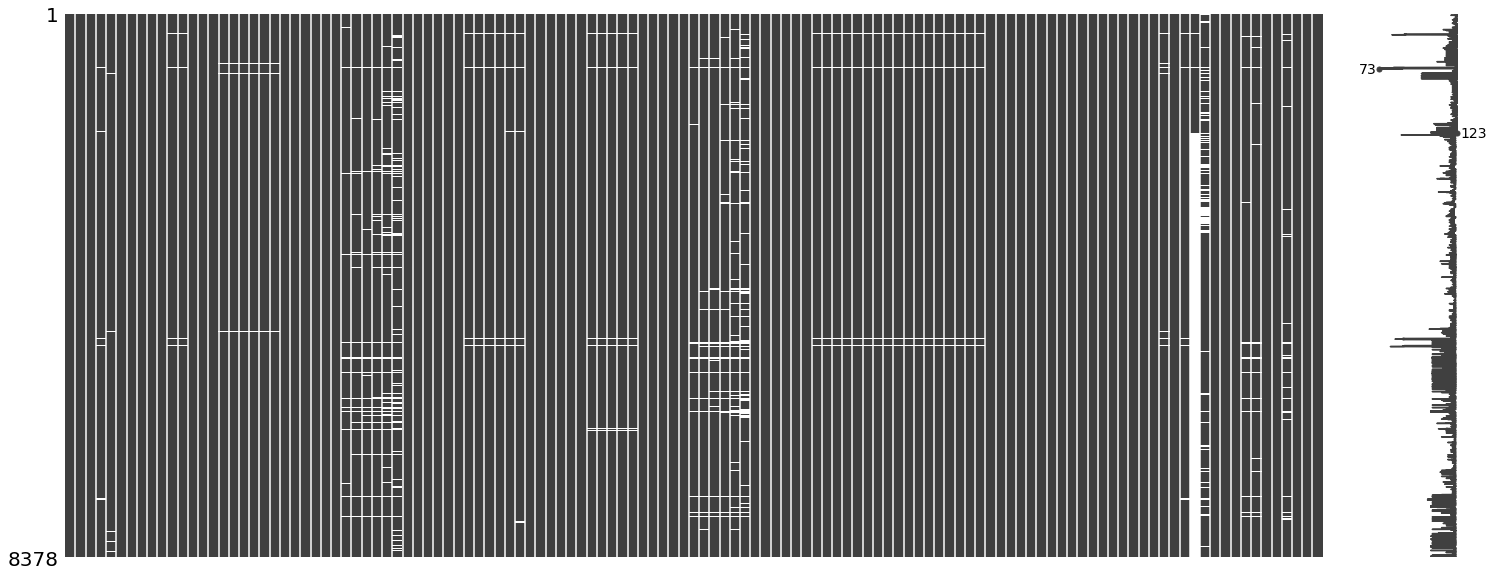

In [69]:
### Visual representation of the missing data in the dataset

missingno.matrix(dating)

# sort missing value then drop row

#### 3.3 Age distribution

Age of the owner

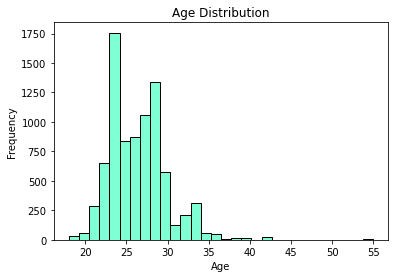

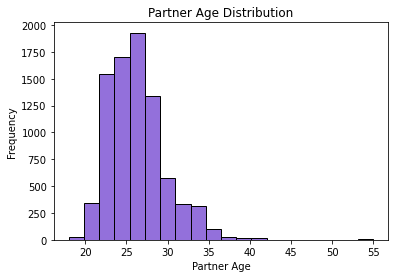

In [70]:
# Extract the "Age" column from the DataFrame
ages = dating['age']

# Create a histogram of the "Age" column
plt.hist(ages, bins=30, color='aquamarine', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


# Extract the "Age_o" column from the DataFrame
agespartner = dating['age_o']

# Create a histogram of the "Age" column
plt.hist(agespartner, bins=20, color='mediumpurple', edgecolor='black')
plt.xlabel('Partner Age')
plt.ylabel('Frequency')
plt.title('Partner Age Distribution')
plt.show()


Boxplot age

<AxesSubplot: >

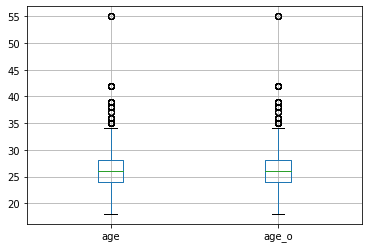

In [71]:
dating[['age', 'age_o']].boxplot()

The box-plot may identify age at 55 as an outlier but according to the nature of data at this age number is still a reasonable number so we consider to keep it.

#### 3.4 Distribution of target (column : "match" (0,1))

In [72]:
target = dating['match'] 
print("Unique values in 'match' column:", target.unique())


Unique values in 'match' column: ["b'0'" "b'1'"]


In [73]:
print("Target variable distribution:")
print(target.value_counts(normalize=True))

Target variable distribution:
b'0'    0.835283
b'1'    0.164717
Name: match, dtype: float64


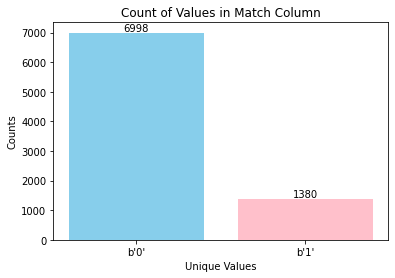

In [74]:
# Plot the distribution of the target variable
match_value_counts = dating['match'].value_counts()

# Create a bar chart
plt.bar(match_value_counts.index, match_value_counts.values, color=['skyblue','pink'])

# Add labels to each bar with count
for xbar, ybar in zip(match_value_counts.index, match_value_counts.values):
    plt.text(xbar, ybar, str(ybar), ha='center', va='bottom')

# Set the title and labels for the chart
plt.title('Count of Values in Match Column')
plt.xlabel('Unique Values')
plt.ylabel('Counts')

# Display the chart
plt.show()

The barplot shows that there is imbalance in target column "match"  
the data of not match : 0 is around triple amount of the value of match : 1

### 4. Data Preprocessing

#### 4.1 Checking column data types

In [75]:
dating.dtypes

has_null                            object
wave                               float64
gender                              object
age                                float64
age_o                              float64
d_age                              float64
d_d_age                             object
race                                object
race_o                              object
samerace                            object
importance_same_race               float64
importance_same_religion           float64
d_importance_same_race              object
d_importance_same_religion          object
field                               object
pref_o_attractive                  float64
pref_o_sincere                     float64
pref_o_intelligence                float64
pref_o_funny                       float64
pref_o_ambitious                   float64
pref_o_shared_interests            float64
d_pref_o_attractive                 object
d_pref_o_sincere                    object
d_pref_o_in

#### 4.2 Removing unwanted characters
All string columns have an unwanted character 'b' and are enclosed by single quotes. We will remove these characters from the columns.

In [76]:
dating.head(3)

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',35.0,20.0,20.0,20.0,0.0,5.0,b'[21-100]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,8.0,6.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',6.0,9.0,7.0,7.0,6.0,5.0,b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[6-8]',b'[0-5]',9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.14,b'[0-0.33]',3.0,2.0,4.0,b'[0-4]',b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',60.0,0.0,0.0,40.0,0.0,0.0,b'[21-100]',b'[0-15]',b'[0-15]',b'[21-100]',b'[0-15]',b'[0-15]',7.0,8.0,10.0,7.0,7.0,5.0,b'[6-8]',b'[6-8]',b'[9-10]',b'[6-8]',b'[6-8]',b'[0-5]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',7.0,8.0,7.0,8.0,5.0,6.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',b'[0-5]',b'[6-8]',9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,b'[9-10]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[0-5]',b'[6-8]',b'[9-10]',b'[0-5]',b'[9-10]',b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',0.54,b'[0.33-1]',3.0,2.0,4.0,b'[0-4]',b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',2.0,4.0,b'[2-5]',b'[2-5]',b'Law',19.0,18.0,19.0,18.0,14.0,12.0,b'[16-20]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',10.0,10.0,10.0,10.0,10.0,10.0,b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',b'[9-10]',15.0,20.0,20.0,15.0,15.0,15.0,b'[0-15]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',6.0,8.0,8.0,8.0,7.0,b'[6-8]',b'[6-8]',b'[6-8]',b'[6-8]',

In [77]:
# We create a function that removes all the unwanted characters
def remove_xters(feature):
    return feature.replace("b'",'').replace("'","")
def remove_sqbrackets(feature):
    return feature.replace("[",'').replace("]","")

# We select string columns and apply the transformation
string_dataset = dating.select_dtypes(include = ['object'])

for feature in string_dataset.columns:
    dating[feature] = dating[feature].apply(lambda x: remove_xters(x))
    dating[feature] = dating[feature].apply(lambda x: remove_sqbrackets(x))

dating[string_dataset.columns].head(3)

,has_null,gender,d_d_age,race,race_o,samerace,d_importance_same_race,d_importance_same_religion,field,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,d_interests_correlate,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,d_like,d_guess_prob_liked,decision,decision_o,match
0,,female,4-6,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2-5,2-5,Law,21-100,16-20,16-20,16-20,0-15,0-15,6-8,6-8,6-8,6-8,6-8,6-8,0-15,16-20,16-20,0-15,0-15,0-15,6-8,6-8,6-8,6-8,6-8,6-8,9-10,6-8,6-8,6-8,0-5,9-10,0-5,6-8,9-10,0-5,0-5,0-5,0-5,0-5,6-8,9-10,0-5,9-10,9-10,9-10,6-8,0-5,0-0.33,0-4,0-3,3-5,6-8,5-6,1,0,0
1,,female,0-1,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2-5,2-5,Law,21-100,0-15,0-15,21-100,0-15,0-15,6-8,6-8,9-10,6-8,6-8,0-5,0-15,16-20,16-20,0-15,0-15,0-15,6-8,6-8,6-8,6-8,6-8,6-8,6-8,6-8,6-8,0-5,6-8,9-10,0-5,6-8,9-10,0-5,0-5,0-5,0-5,0-5,6-8,9-10,0-5,9-10,9-10,9-10,6-8,0-5,0.33-1,0-4,0-3,3-5,6-8,5-6,1,0,0
2,,female,0-1,Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,2-5,2-5,Law,16-20,16-20,16-20,16-20,0-15,0-15,9-10,9-10,9-10,9-10,9-10,9-10,0-15,16-20,16-20,0-15,0-15,0-15,6-8,6-8,6-8,6-8,6-8,0-5,6-8,9-10,6-8,0-5,6-8,9-10,0-5,6-8,9-10,0-5,0-5,0-5,0-5,0-5,6-8,9-10,0-5,9-10,9-10,9-10,6-8,0-5,0-0.33,0-4,0-3,3-5,6-8,0-4,1,1,1


#### 4.3 Dropping missing data

##### 4.3.1 remove in each row if that row contain missing value more than 5 columns


We going to remove row that contain missing value from top 5% of the total as a rule of thumb 
###### Ref: https://www.hubresearch.ca/bridging-the-data-gap-how-to-deal-with-missing-data-in-observational-studies/#:~:text=As%20a%20rule%20of%20thumb,any%20significant%20ramifications%20(3).


In [78]:

missing_values = dating.isnull().sum(axis=1)
threshold = 5
rows_with_too_many_missing_values = dating[missing_values > threshold]
num_rows_with_too_many_missing_values = len(rows_with_too_many_missing_values)
print("Sum of rows with too many missing values:", num_rows_with_too_many_missing_values)

Sum of rows with too many missing values: 475


In [79]:
dating = dating.dropna(thresh=dating.shape[1]-threshold)
num_missing = dating.isna().sum()
print(num_missing)

has_null                              0
wave                                  0
gender                                0
age                                  25
age_o                                25
d_age                                 0
d_d_age                               0
race                                  0
race_o                                0
samerace                              0
importance_same_race                  0
importance_same_religion              0
d_importance_same_race                0
d_importance_same_religion            0
field                                 0
pref_o_attractive                     0
pref_o_sincere                        0
pref_o_intelligence                   0
pref_o_funny                          9
pref_o_ambitious                     17
pref_o_shared_interests              37
d_pref_o_attractive                   0
d_pref_o_sincere                      0
d_pref_o_intelligence                 0
d_pref_o_funny                        0


<AxesSubplot: >

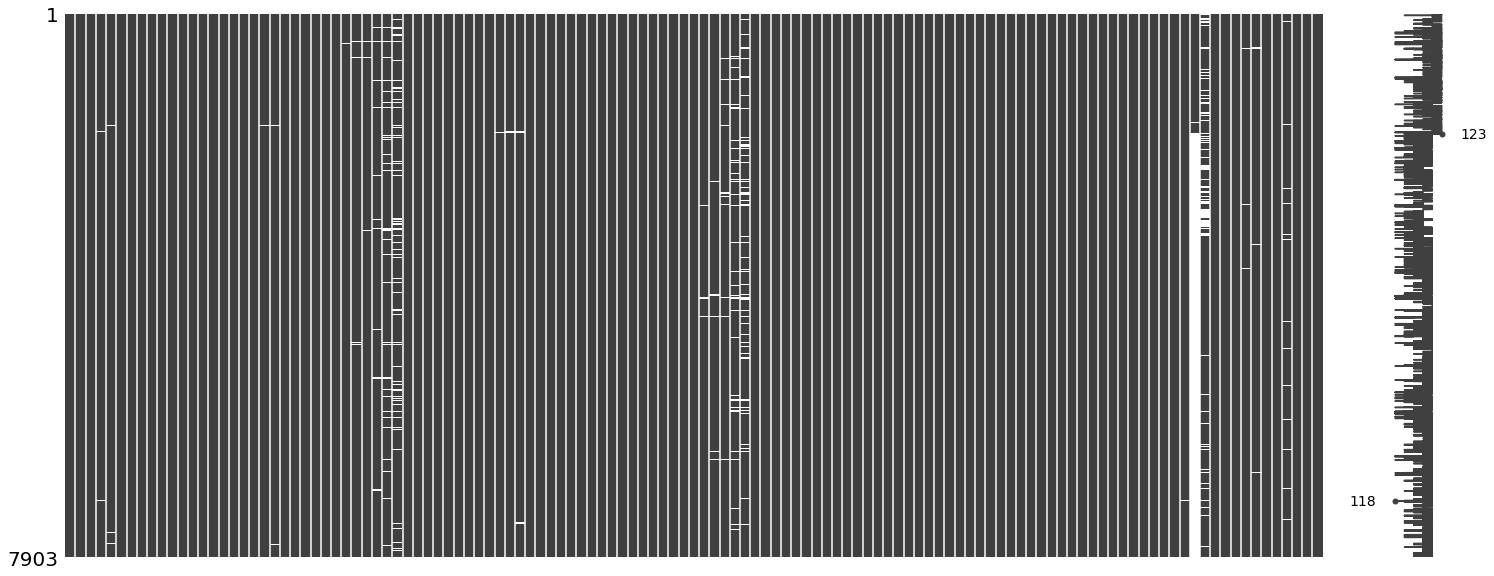

In [80]:
### Visual representation of the missing data in the dataset
missingno.matrix(dating)


Then we considered remove 'has null', 'wave' because these 2 column has no further purpose and meaning.
and remove 'expected_num_interested_in_me' because it contain missing value more than 60% of total data in that column

In [81]:
# Drop the has_null and wave columns
dating.drop(['has_null','wave','expected_num_interested_in_me'], axis = 1, inplace= True)

##### 4.3.2 Age
There are four different columns for age and these are: age of individual, age of partner, age difference, and age group (where ages have been binned into categories). However the age difference column is not standardized since the difference is between the higher age and the lower age. We will standardize the difference by subtracting age between each individual and their partner. Since the direction of the difference matters, the column will have both positive and negative values. We will then drop the other age columns

💡 Impute missing value for age

In [82]:
age_median = dating['age'].median()
print('Median of the age column:', age_median)

#Impute missing value
dating['age'].fillna(age_median, inplace=True)

#Check the imputation
missing_values_after_imputation = dating['age'].isnull().sum()
print('Number of missing values in the age column after imputation:', missing_values_after_imputation)

Median of the age column: 26.0
Number of missing values in the age column after imputation: 0


In [83]:
# Create age difference column
dating['age_diff'] = dating['age'] - dating['age_o']

# Drop other age columns
dating.drop(['age','age_o', 'd_age', 'd_d_age'], axis = 1, inplace = True)

##### Imputing all missing value

In [84]:
#imputing remaining null values with median
null_counts_revised = dating.isnull().sum()

for column, null_count in null_counts_revised.items():
    if null_count > 0:
        print(f"{column}: {null_count}")
        median_value = dating[column].median()
        dating[column].fillna(median_value, inplace=True)

pref_o_funny: 9
pref_o_ambitious: 17
pref_o_shared_interests: 37
attractive_o: 9
sinsere_o: 69
intelligence_o: 83
funny_o: 137
ambitous_o: 485
shared_interests_o: 826
funny_important: 9
ambtition_important: 18
shared_interests_important: 38
attractive_partner: 9
sincere_partner: 65
intelligence_partner: 87
funny_partner: 135
ambition_partner: 486
shared_interests_partner: 830
expected_happy_with_sd_people: 16
expected_num_matches: 1104
like: 38
guess_prob_liked: 101
met: 173
age_diff: 25


In [85]:
for column, null_count in null_counts_revised.items():
    if null_count == 0:
        print(f"{column}: {null_count}")

gender: 0
race: 0
race_o: 0
samerace: 0
importance_same_race: 0
importance_same_religion: 0
d_importance_same_race: 0
d_importance_same_religion: 0
field: 0
pref_o_attractive: 0
pref_o_sincere: 0
pref_o_intelligence: 0
d_pref_o_attractive: 0
d_pref_o_sincere: 0
d_pref_o_intelligence: 0
d_pref_o_funny: 0
d_pref_o_ambitious: 0
d_pref_o_shared_interests: 0
d_attractive_o: 0
d_sinsere_o: 0
d_intelligence_o: 0
d_funny_o: 0
d_ambitous_o: 0
d_shared_interests_o: 0
attractive_important: 0
sincere_important: 0
intellicence_important: 0
d_attractive_important: 0
d_sincere_important: 0
d_intellicence_important: 0
d_funny_important: 0
d_ambtition_important: 0
d_shared_interests_important: 0
attractive: 0
sincere: 0
intelligence: 0
funny: 0
ambition: 0
d_attractive: 0
d_sincere: 0
d_intelligence: 0
d_funny: 0
d_ambition: 0
d_attractive_partner: 0
d_sincere_partner: 0
d_intelligence_partner: 0
d_funny_partner: 0
d_ambition_partner: 0
d_shared_interests_partner: 0
sports: 0
tvsports: 0
exercise: 0
di

##### 4.3.3 Binned variables
The speed dating dataset has some of the numeric features binned into categories. This is a duplication of information which increases the dimensionality of the dataset without adding any significant value. We will remove all the duplicated features. Conveniently, the names of these binned features have the prefix "d_". We will use this to subset and remove these features. Before the selection, the dataset has 117 features, and after the selection, we remain with 63 features.


In [86]:
dating.shape

(7903, 117)

In [87]:
to_drop = [column_name for column_name in dating.columns if column_name.startswith('d_')]
dating.drop(to_drop, axis = 1, inplace = True)
dating.shape

(7903, 63)

##### 4.3.4 Field
In the individual field indicating their careers, there's an overlapping of values. For instance, Business, which is the most popular field still comprises of MBA (2nd most popular), Finance, business [MBA] etc. Physics, Chemistry, Biology all fall under science. Due to this variation and overlapping, we will drop the column

In [88]:
display(dating.field.value_counts().head(30))
dating.drop('field',axis = 1, inplace = True)

Business                  493
Law                       440
MBA                       434
Social Work               370
International Affairs     245
Electrical Engineering    154
Psychology                126
law                       118
Finance                   112
Mathematics                94
Film                       90
business                   90
Sociology                  88
Biology                    85
Engineering                75
Business MBA               75
Biochemistry               67
Political Science          67
Clinical Psychology        66
Economics                  65
chemistry                  57
Education                  55
Operations Research        54
Physics                    54
School Psychology          52
medicine                   51
sociology                  50
Urban Planning             48
Mechanical Engineering     48
English                    45
Name: field, dtype: int64

##### 4.3.5 Met
The variable met answers the question as to whether the person has previously met the partner. Since the responses are either yes(1) or no (0), we will clean the column and change responses with neither values, and replace them with the most frequent value. Since they are only a few values, they will not skew our data.

In [89]:
print(f'Before \n{dating.met.value_counts()}')

for number in [3.0, 5.0, 6.0, 7.0, 8.0]:
    dating['met'].replace(number,0, inplace =True)
    
print(f'\nAfter \n{dating.met.value_counts()}')

Before 
0.0    7560
1.0     336
7.0       3
5.0       2
3.0       1
8.0       1
Name: met, dtype: int64

After 
0.0    7567
1.0     336
Name: met, dtype: int64


##### 4.3.6 Variables similar to the y variable
The two variables 'decision' and 'decision_o' have similar responses almost similar to the variable being predicted. We will therefore remove these two features.

In [90]:
display(dating.groupby('decision')['match'].value_counts())
print()
display(dating.groupby('decision_o')['match'].value_counts())

dating.drop(['decision_o','decision'], axis = 1, inplace = True)

decision  match
0         0        4519
1         0        2050
          1        1334
Name: match, dtype: int64

decision_o  match
0           0        4513
1           0        2056
            1        1334
Name: match, dtype: int64

#### 4.4 Encoding Feature 

In [91]:
le = LabelEncoder()

In [92]:
def Encoder(df):
    columnsToEncode = list(df.select_dtypes(include=['category','object']))
    for feature in columnsToEncode:
      try:
          df[feature] = le.fit_transform(df[feature])
      except:
          print('Error encoding '+feature)
    return df

In [93]:
columnsToEncode = list(dating.select_dtypes(include=['category','object']))

In [94]:
for feature in columnsToEncode:
    try:
      dating[feature] = le.fit_transform(dating[feature])
    except:
      print('Error encoding '+feature)

In [95]:
dating_encode = Encoder(dating)

In [96]:
dating_encode.head()

,gender,race,race_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_matches,like,guess_prob_liked,met,match,age_diff
0,0,0,2,0,2.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,6.0,9.0,7.0,7.0,6.0,5.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.14,3.0,4.0,7.0,6.0,0.0,0,-6.0
1,0,0,2,0,2.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,7.0,8.0,5.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.54,3.0,4.0,7.0,5.0,1.0,0,-1.0
2,0,0,0,1,2.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,8.0,9.0,8.0,5.0,7.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.16,3.0,4.0,7.0,5.0,1.0,1,-1.0
3,0,0,2,0,2.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,8.0,7.0,6.0,8.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.61,3.0,4.0,7.0,6.0,0.0,1,-2.0
4,0,0,3,0,2.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,6.0,7.0,7.0,6.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.21,3.0,4.0,6.0,6.0,0.0,1,-3.0


#### 5. Dealing with imbalanced data and Split data


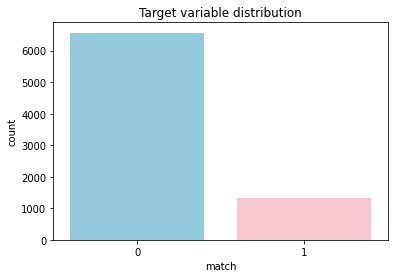

In [97]:
# Plot the distribution of the target variable
sns.countplot(x=dating_encode['match'], palette=['skyblue','pink'])
plt.title("Target variable distribution")
plt.show()


In [98]:
X = dating_encode.drop('match', axis = 1)
y = dating_encode['match']

In [99]:
# Instantiate RandomUnderSampler
sampler = RandomUnderSampler(random_state=33)

# Perform undersampling on your feature and target data
X_resampled, y_resampled = sampler.fit_resample(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# X is your feature data, y is your target data

# Print the counts of each class in the training set after undersampling
print("Training set class counts after undersampling: ", np.bincount(y_train))

# Print the counts of each class in the test set
print("Test set class counts: ", np.bincount(y_test))

Training set class counts after undersampling:  [1070 1064]
Test set class counts:  [264 270]


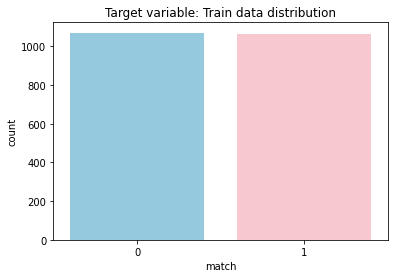

In [100]:
# Plot the distribution of the target variable
sns.countplot(x=y_train, palette=['skyblue','pink'])
plt.title("Target variable: Train data distribution")
plt.show()


In [101]:
dating.head()


,gender,race,race_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_matches,like,guess_prob_liked,met,match,age_diff
0,0,0,2,0,2.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,6.0,9.0,7.0,7.0,6.0,5.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.14,3.0,4.0,7.0,6.0,0.0,0,-6.0
1,0,0,2,0,2.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,7.0,8.0,5.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.54,3.0,4.0,7.0,5.0,1.0,0,-1.0
2,0,0,0,1,2.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,8.0,9.0,8.0,5.0,7.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.16,3.0,4.0,7.0,5.0,1.0,1,-1.0
3,0,0,2,0,2.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,8.0,7.0,6.0,8.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.61,3.0,4.0,7.0,6.0,0.0,1,-2.0
4,0,0,3,0,2.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,6.0,7.0,7.0,6.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.21,3.0,4.0,6.0,6.0,0.0,1,-3.0


### 7. Model evaluation before dimension reduction
We train and evaluate our models before we begin dimension reduction to find the accuracy when we use all the features. We will use the xgboost classifier for our evaluation since it has the highest accuracy of 0.875. This will therefore be the base value with which we will compare the accuracy of our model after dimension reduction

In [102]:
# We instantiate different models to test their accuracy
logreg = LogisticRegression(max_iter = 10000)
svc = SVC()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
xg_cl = xgb.XGBClassifier()

classifiers = [('logreg',logreg),('svc',svc),('knn',knn),('random forest',rf),('xgboost',xg_cl)]

# We fit the different models and compute the accuracy
for clf_name, model in classifiers:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = (np.sum(y_pred == y_test))/(len(y_pred))
    print(clf_name, accuracy)

logreg 0.7734082397003745
svc 0.7771535580524345
knn 0.6385767790262172
random forest 0.7640449438202247
xgboost 0.7790262172284644


### 8. Dimension reduction

#### 8.1 Feature selection with Random forests¶
Random forest classifiers have a feature importances attribute that shows the contribution of each feature to the model.

In [103]:
rf = RandomForestClassifier()

# Fit the classifier
rf.fit(X_train, y_train)

# Retrieve the feature importances
rf_importance = pd.Series(rf.feature_importances_, index = rf.feature_names_in_)
rf_importance = rf_importance.sort_values(ascending = False)
rf_importance.head()

like                  0.061408
funny_o               0.050015
attractive_partner    0.048156
attractive_o          0.047967
shared_interests_o    0.042905
dtype: float64

💥💡💡💥💡The top most important features according to the random forest classifier are: 1. Rating by partner (about me) on attractiveness 2. Whether they like their partner 3. Rating by partner (about me) on shared interest 4. Rating by partner (about me) at night of event on being funny 5. Rating on your partner being funny The least important feature is the race of the person or of their parner. แก้ด้วยยยยยยยย

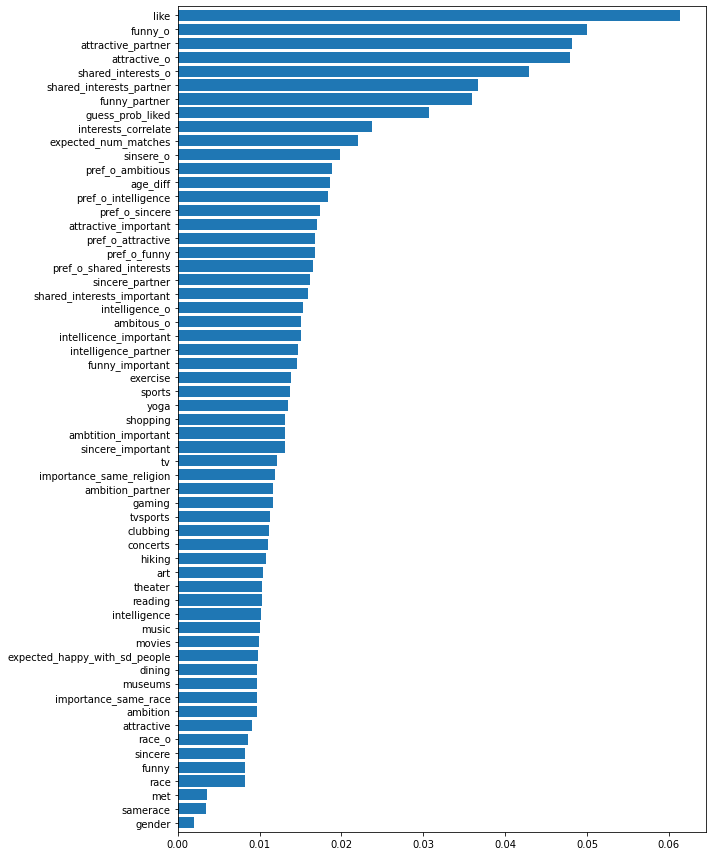

In [104]:
# Visualizing the feature importances
fig = plt.figure(figsize = (10,12))
rf_importance.sort_values(ascending = True).plot(kind = 'barh', width =0.8)
plt.tight_layout()
plt.show()


The feature importance values of random forests are in percentage. Therefore, we can try and select features with a contribution of more than 1% and see if removing the features reduces noise, thus improving our model accuracy.

In [105]:
# Selecting features 
top_features = rf_importance[rf_importance>0.01].index

xg_cl = xgb.XGBClassifier()

# Fit the model
xg_cl.fit(X_train[top_features], y_train)

# Make predictions
y_pred = xg_cl.predict(X_test[top_features])
accuracy = (np.sum(y_pred == y_test))/(len(y_pred))
print(f'Dropping features from {len(rf_importance)} to {len(top_features)} give an accuracy of {accuracy}')

Dropping features from 59 to 45 give an accuracy of 0.7715355805243446


#### 8.2 Feature selection with xgboost
Xgboost is used in feature selection by outputting feature importance values from a trained model. To leverage the performance and efficiency of the algorithm, the dataset is converted to a DMatrix format which is used for training. The top most important features according to the xgboost classifier are: 1. Rating by partner (about me) on attractiveness 2. Rating of how you think your partner likes you? 3. Rating by partner (about me) on being funny 4. Rating by partner (about me) on shared interest 5. How many matches do you expect to get? Xgboost has the .plot_importance() method that is used to visualize the importance values of all features in a plot.

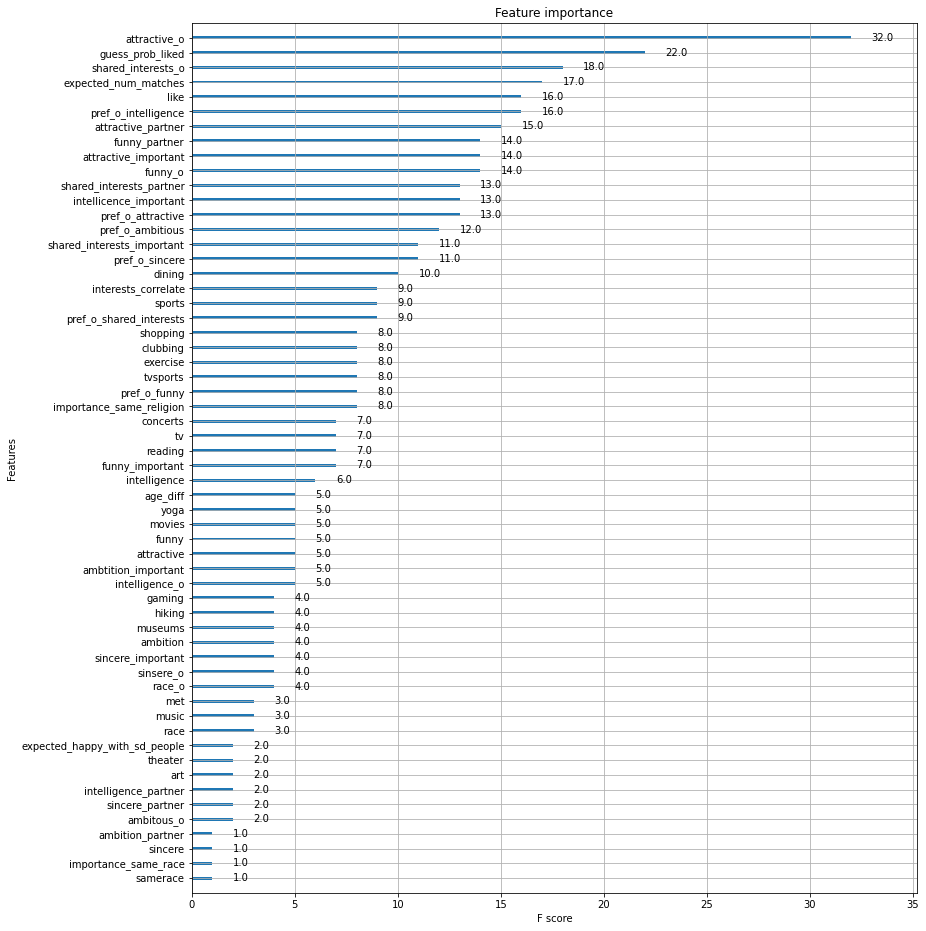

In [106]:
# Convert the data to dmatrix
dating_matrix = xgb.DMatrix(data = X_train, label = y_train)
params = {'objective':'binary:logistic'}

# Train data using dmatrix format
xgb_clf = xgb.train(dtrain = dating_matrix, params = params, num_boost_round = 10)

# Plot the feature importances
fig, ax  = plt.subplots(figsize = (13,16))
xgb.plot_importance(xgb_clf, ax = ax)
plt.show()

In xgboost, the scores of each feature can be retrieved using the .get_score() method

In [107]:
xgb_features = pd.DataFrame(xgb_clf.get_score(), index = ['score']).T
xgb_features['score'].sort_values(ascending=False).head(8)

attractive_o            32.0
guess_prob_liked        22.0
shared_interests_o      18.0
expected_num_matches    17.0
like                    16.0
pref_o_intelligence     16.0
attractive_partner      15.0
attractive_important    14.0
Name: score, dtype: float64

We will evaluate the accuracy of the model with features with a score greater than 3. This selects 47 features which does not greatly affect our accuracy.

In [108]:
xgb_cl = xgb.XGBClassifier()

# Selecting features
xgb_top_features = xgb_features[xgb_features['score'] > 3].index

# Fit and predict
xgb_cl.fit(X_train[xgb_top_features],y_train)
y_pred = xgb_cl.predict(X_test[xgb_top_features])
accuracy = (np.sum(y_pred == y_test))/(len(y_pred))
print(f'Dropping features from 70 to {len(xgb_top_features)} results in an accuracy of {accuracy}')

Dropping features from 70 to 45 results in an accuracy of 0.7659176029962547


#### 8.3 Dimension reduction with Recursive Feature Elimination - RFE
RFE is feature selection algorithm that produces feature importances or feature coeffients when a model is passed to it. It fits the model and drops the weakest features, and repeats the process until the specified number of features is attained. Using xgboost classifier, we test the accuracy of different number of features As seen below, the accuracy of a model with 70 features isn't very different with a model fitted with 40 features. In fact, reducing features from 30 to 15 has an insignificant impact on the model's accuracy. In essence, if you are more concerned with what features play an important role in your prediction, the automatic selection of features by the recursive feature elimination method is very effective. In this circumstance, it's a tradeoff between dimensionality and accuracy.

In [109]:
from sklearn.feature_selection import RFE

xgb_cl = xgb.XGBClassifier()

for features in list(range(70,1,-5)):
    # Instantiate and fit the RFE
    rfe = RFE(estimator = xgb_cl, n_features_to_select = features)
    rfe.fit(X_train,y_train)
    
    # Make predictions
    y_pred = rfe.predict(X_test)
    accuracy = (np.sum(y_pred == y_test))/(len(y_pred))
    print(f'The accuracy of {features} features is {accuracy}')

The accuracy of 70 features is 0.7790262172284644
The accuracy of 65 features is 0.7790262172284644
The accuracy of 60 features is 0.7790262172284644
The accuracy of 55 features is 0.7528089887640449
The accuracy of 50 features is 0.7453183520599251
The accuracy of 45 features is 0.7490636704119851
The accuracy of 40 features is 0.7715355805243446
The accuracy of 35 features is 0.7846441947565543
The accuracy of 30 features is 0.7528089887640449
The accuracy of 25 features is 0.7677902621722846
The accuracy of 20 features is 0.7790262172284644
The accuracy of 15 features is 0.7621722846441947
The accuracy of 10 features is 0.7546816479400749
The accuracy of 5 features is 0.7378277153558053


##### 8.3.1 Selecting the features
Suppose we want a balance between dimensionality of the dataset and the accuracy, we can select 15 features whose accuracy is 0.867. The .support_ attribute is used to give a mask with True and False values for features selected and those not selected respectively.

In [110]:
xgb_cl = xgb.XGBClassifier()

# Instatiate RFE with 15 features
rfe = RFE(estimator = xgb.XGBClassifier(), n_features_to_select = 15)

# Fit and predict
rfe.fit(X_train,y_train)
y_pred = rfe.predict(X_test)
accuracy = (np.sum(y_pred == y_test))/(len(y_pred))
print(f'Model accuracy is {accuracy}')

# Select a mask with features selected
mask = rfe.support_
xgb_top_15_features = X_train.columns[mask].tolist()
print(f'\nTop 15 features in the xgb classifier are:\n{xgb_top_15_features}')

Model accuracy is 0.7621722846441947

Top 15 features in the xgb classifier are:
['attractive_o', 'funny_o', 'shared_interests_o', 'attractive_important', 'intelligence', 'funny', 'attractive_partner', 'funny_partner', 'shared_interests_partner', 'sports', 'shopping', 'expected_num_matches', 'like', 'guess_prob_liked', 'met']


##### 8.3.2 Combining features from different models
You can use different models and choose features with selected by all the models, and then use these features for prediction. We will select the top 30 features in three models and select common features

Selecting random forest features

In [111]:
rf = RandomForestClassifier()

rfe = RFE(estimator = rf, n_features_to_select = 30)
rfe.fit(X_train,y_train)
y_pred = rfe.predict(X_test)
accuracy = (np.sum(y_pred == y_test))/(len(y_pred))
print(f'Model accuracy is {accuracy}')

mask_rfe = rfe.support_

Model accuracy is 0.7752808988764045


Selecting logistic Regression features

In [112]:
logreg = LogisticRegression(max_iter =100000)

rfe = RFE(estimator = logreg, n_features_to_select = 30)
rfe.fit(X_train,y_train)
y_pred = rfe.predict(X_test)
accuracy = (np.sum(y_pred == y_test))/(len(y_pred))
print(f'Model accuracy is {accuracy}')

mask_log = rfe.support_

Model accuracy is 0.7846441947565543


Selecting xgboost features

In [113]:
xgb_cl = xgb.XGBClassifier()

rfe = RFE(estimator = xgb_cl, n_features_to_select = 30)
rfe.fit(X_train,y_train)
y_pred = rfe.predict(X_test)
accuracy = (np.sum(y_pred == y_test))/(len(y_pred))
print(f'Model accuracy is {accuracy}')

mask_xgb = rfe.support_

Model accuracy is 0.7528089887640449


##### 8.3.3 Evaluating features selected by the three classifiers
After selecting 30 features in all our models, we will combine them to select features chosen by all the models. We will use these features for our prediction. A total of 11 features were present in all the models.

In [114]:
# Find sum of mask to identify common features 
mask_all_models = np.sum([mask_rfe, mask_log,mask_xgb], axis=0)

# Select features selected by all the three models
mask = mask_all_models == 3
most_important_features = X_train.columns[mask]

print(most_important_features.shape)
print()
print(most_important_features)

(13,)

Index(['attractive_o', 'funny_o', 'shared_interests_o', 'attractive_partner',
       'funny_partner', 'shared_interests_partner', 'sports', 'exercise', 'tv',
       'shopping', 'expected_num_matches', 'like', 'guess_prob_liked'],
      dtype='object')


When the 11 features selected by the three models are evaluated, they give an accuracy of 0.863 with xgboost, a value not very far from 0.875 when using 70 features.

In [115]:
xg_cl = xgb.XGBClassifier()

xg_cl.fit(X_train[most_important_features], y_train)
y_pred = xg_cl.predict(X_test[most_important_features])
accuracy = (np.sum(y_pred == y_test))/(len(y_pred))
print(f'Accuracy of 11 features selected by all models is {accuracy}')    

Accuracy of 11 features selected by all models is 0.7415730337078652


#### 8.4 Dimension reduction with PCA
PCA is another dimension-reduction technique. It has the explained_variance_ratio_ attribute that provides the variance of each feature.

In [116]:
pca = PCA()
pca.fit(X_train, y_train)
variance = pca.explained_variance_ratio_
variance

array([2.30702825e-01, 1.86082069e-01, 6.03691496e-02, 5.75082864e-02,
       5.18965031e-02, 5.15481736e-02, 4.55699988e-02, 4.46102167e-02,
       3.85066280e-02, 3.44606905e-02, 2.00264160e-02, 1.91479736e-02,
       1.60826203e-02, 1.41990589e-02, 1.24599780e-02, 1.05764753e-02,
       8.70392350e-03, 7.47892303e-03, 6.97854280e-03, 6.62982263e-03,
       5.58484926e-03, 5.16001124e-03, 4.87503740e-03, 4.57665778e-03,
       3.94606282e-03, 3.80344095e-03, 3.69563239e-03, 3.14200441e-03,
       2.94425664e-03, 2.68301877e-03, 2.57112476e-03, 2.41612223e-03,
       2.40786272e-03, 2.25975904e-03, 2.13095940e-03, 2.03237798e-03,
       1.88504698e-03, 1.63446747e-03, 1.59574193e-03, 1.58233113e-03,
       1.51390254e-03, 1.47724207e-03, 1.36461164e-03, 1.18882099e-03,
       1.16498424e-03, 1.12467346e-03, 1.08618044e-03, 9.80604455e-04,
       9.46414418e-04, 8.55310842e-04, 7.44841266e-04, 7.22660984e-04,
       6.71559088e-04, 6.46172257e-04, 5.47905685e-04, 2.40898062e-04,
      

A plot of explained variance ratio is a good indicator of the ideal number of n_components to be used in PCA. The number of components is picked from the elbow where there is an abrupt shift in explained variance. In this case, it is 11.

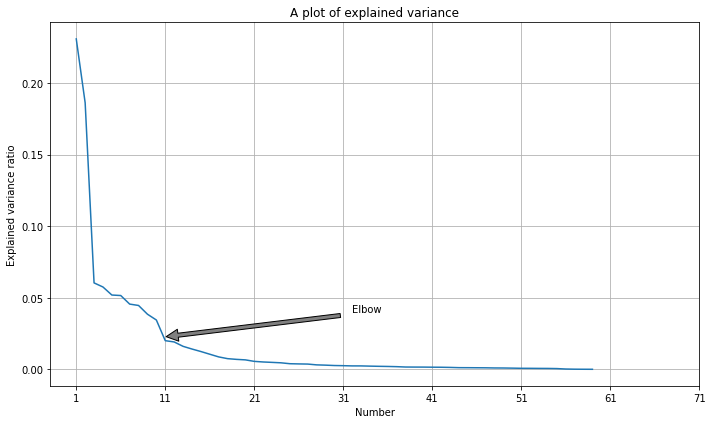

In [117]:
fig = plt.figure(figsize = (10,6))
sns.lineplot(variance)
plt.grid(True)
plt.xlabel('Number')
plt.ylabel('Explained variance ratio')
plt.title('A plot of explained variance')
plt.xticks(np.arange(0,80,10), np.arange(1,81,10))
plt.annotate('Elbow',xy =[9, 0.022], xytext = [31, 0.04], arrowprops=dict(facecolor='grey', shrink=0.05))
plt.tight_layout()
plt.show()

Using the number of components from the elbow, we fit_transform the train dataset and tranform the test set. Using the xgb classifier after reducing the dimensions of data from 70 to 11 features results in an accuracy of 0.85, a slight drop from 0.87 when using 70 features.

In [118]:
# Instantiate PCA with 11 components
pca = PCA(n_components = 11)

xgb_cl = xgb.XGBClassifier()

# Fit and transform the training set
X_train_transformed = pca.fit_transform(X_train)

# Transform the test set
X_test_tranformed = pca.transform(X_test)

# Fit and predict with the transformed datasets
xgb_cl.fit(X_train_transformed,y_train)
y_pred = xgb_cl.predict(X_test_tranformed)
accuracy = (np.sum(y_pred == y_test))/(len(y_pred))
print(accuracy)
print(y_pred)

0.5749063670411985
[0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1
 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1
 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0
 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0
 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1
 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1
 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1
 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1
 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1
 1 1 0